# setting number of layers


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from six.moves import cPickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
%matplotlib inline

Definding function:

In [2]:
# this function give file of data  as numpy array or image

def getImageData(filename):
    f = open(filename,'rb')
    datadict = cPickle.load(f,encoding='latin1') #Why the hell latin1 ???
    f.close()
    X=datadict['data'].reshape((len(datadict['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    return X


# this function give file of data  as dictionary


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

shape of input image: (10000, 32, 32, 3)
#############################################
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape of target vector: (10000, 10)


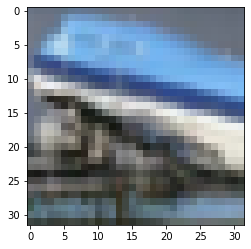

In [173]:
file='cifar-10-batches-py\data_batch_3'

X_image = getImageData(file)
x=unpickle(file)


print('shape of input image:',X_image.shape)
print('#############################################')
plt.imshow(X_image[35])


#geting vector  of target of data:
y=x[b'labels']
y_train=to_categorical(y)
print(y_train[35])
print('shape of target vector:',y_train.shape)

In [174]:
x_flatten=X_image.reshape(10000,-1)

x_train=x_flatten/255

# Constructing model:

In [175]:
model=Sequential()


model.add(Dense(1000,activation='relu',input_dim=3072))
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 1000)              3073000   
_________________________________________________________________
dense_98 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_99 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_100 (Dense)            (None, 10)                5010      
Total params: 4,579,510
Trainable params: 4,579,510
Non-trainable params: 0
_________________________________________________________________


In [176]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [177]:
history=model.fit(x_train,y_train,validation_split=0.1,batch_size=128,epochs=40)

Epoch 1/40
71/71 [==============================] - 2s 22ms/step - loss: 2.2529 - accuracy: 0.2033 - val_loss: 1.9520 - val_accuracy: 0.2640
Epoch 2/40
71/71 [==============================] - 1s 19ms/step - loss: 1.8984 - accuracy: 0.3082 - val_loss: 1.8427 - val_accuracy: 0.3280
Epoch 3/40
71/71 [==============================] - 1s 20ms/step - loss: 1.7852 - accuracy: 0.3506 - val_loss: 1.8324 - val_accuracy: 0.3280
Epoch 4/40
71/71 [==============================] - 1s 19ms/step - loss: 1.7524 - accuracy: 0.3611 - val_loss: 1.7308 - val_accuracy: 0.3770
Epoch 5/40
71/71 [==============================] - 1s 18ms/step - loss: 1.6822 - accuracy: 0.3941 - val_loss: 1.8240 - val_accuracy: 0.3430
Epoch 6/40
71/71 [==============================] - 1s 19ms/step - loss: 1.6446 - accuracy: 0.4087 - val_loss: 1.7145 - val_accuracy: 0.3800
Epoch 7/40
71/71 [==============================] - 1s 19ms/step - loss: 1.5972 - accuracy: 0.4240 - val_loss: 1.7024 - val_accuracy: 0.3630
Epoch 8/40
71

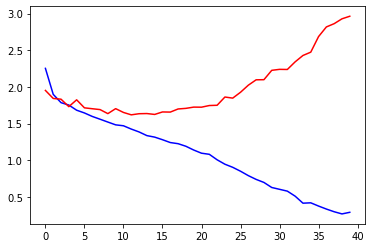

In [178]:
plt.plot(history.history['loss'],'b-')
plt.plot(history.history['val_loss'],'r-')
plt.show()

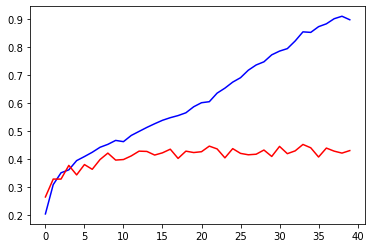

In [179]:
plt.plot(history.history['accuracy'],'b-')
plt.plot(history.history['val_accuracy'],'r-')
plt.show()

In [180]:
print('max acc of validation:',max(history.history['val_accuracy']))

max acc of validation: 0.4519999921321869


In [181]:
print('max acc of trian:',max(history.history['accuracy']))

max acc of trian: 0.9108889102935791
